# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here

def dice_rolling(x):
    
    return random.choices([1,2,3,4,5,6], k=x)

turn=list(range(1,10))
turn
dice_res=pd.DataFrame(list(zip(turn,dice_rolling(10))),columns=["Turn","Result"])
dice_res

,Turn,Result
0,1,4
1,2,2
2,3,5
3,4,4
4,5,3
5,6,6
6,7,5
7,8,5
8,9,4


#### 2.- Plot the results sorted by value.

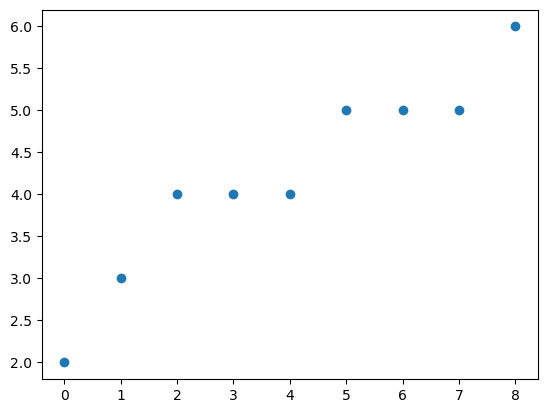

In [4]:
plt.plot(dice_res.sort_values(by=["Result"],ascending=True)["Result"].values, 'o')

   Turn  Result
1     2       2
4     5       3
0     1       4
3     4       4
8     9       4
2     3       5
6     7       5
7     8       5
5     6       6


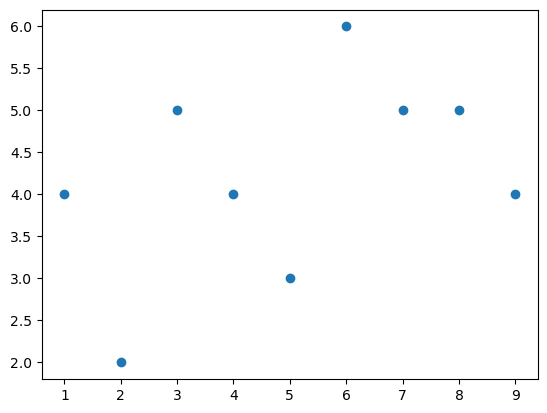

In [5]:
# your code here

print(dice_res.sort_values(by=["Result"],ascending=True))
plt.scatter(x=dice_res["Turn"],y=dice_res["Result"])


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<BarContainer object of 5 artists>

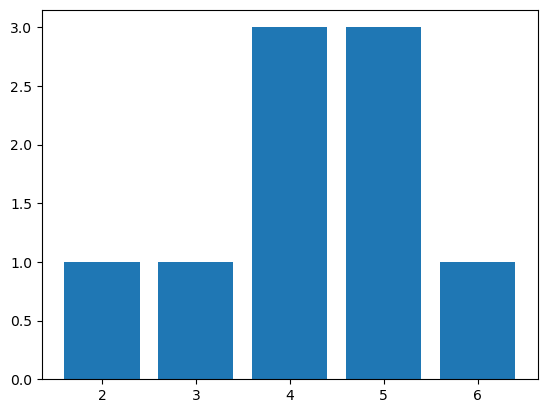

In [6]:
# your code here
dice_freq=(pd.DataFrame(dice_res["Result"].value_counts()).reset_index())
dice_freq.columns=["Result","freq"]
dice_freq
plt.bar(dice_freq["Result"],dice_freq["freq"])
#dice_res.hist()

In [7]:
"""
your comments here

the graph reprensent the same thing. we can see the frequency for each number of the dice
"""

'\nyour comments here\n\nthe graph reprensent the same thing. we can see the frequency for each number of the dice\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

def mean_funct(x):
    return x.sum()/len(x)

mean_funct(dice_res)

Turn      5.000000
Result    4.222222
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here

dice_res2=pd.DataFrame(dice_res["Result"].value_counts())
dice_res2.index.rename("result",inplace=True)
dice_res2=dice_res2.reset_index().rename(columns={"Result":"Freq"})
display(dice_res2)
mean=(dice_res2["result"]*dice_res2["Freq"]).sum()/dice_res2["Freq"].sum()
mean



,result,Freq
0,4,3
1,5,3
2,2,1
3,3,1
4,6,1


4.222222222222222

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here

def mean(x):

    if len(dice_res["Result"])%2!=0:
        row=len(dice_res)/2-0.5
        #print(row)
        #(dice_res["Result"].sort_values()).iloc[row]
        dice_res_sorted=dice_res.sort_values(by="Result")
        mean=dice_res_sorted["Result"].iloc[int(row)]
    else:
        dice_res_sorted=dice_res.sort_values(by="Result")
        row=len(dice_res)/2-1
        mean=(dice_res_sorted["Result"].iloc[int(row)]+dice_res_sorted["Result"].iloc[int(row)+1])/2

    return mean
    




#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here

## not to this one

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

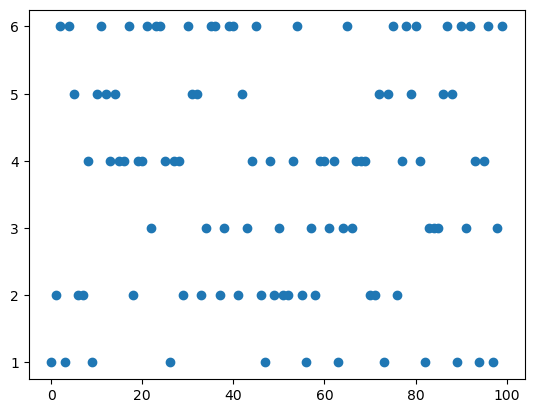

In [12]:
# your code here
data=pd.read_csv(r"C:\Users\te_sa\Teresa\Ironhack\Labs\Week 4\Descriptive-Stats\data\roll_the_dice_hundred.csv")
data.head()

data.sort_values(by="value")

plt.scatter(x=data["roll"],y=data["value"])

In [13]:
"""
your comments here
the sample is big, the numbers seem fairly well distributed

"""

'\nyour comments here\nthe sample is big, the numbers seem fairly well distributed\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here

mean=mean_funct(data["value"])
mean

3.74

#### 3.- Now, calculate the frequency distribution.


In [15]:
# your code here

data.head()
data_freq=pd.DataFrame(data["value"].value_counts())
data_freq
data_freq.index.rename("result",inplace=True)
data_freq=data_freq.reset_index().rename(columns={"value":"freq"})
data_freq


,result,freq
0,6,23
1,4,22
2,2,17
3,3,14
4,1,12
5,5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

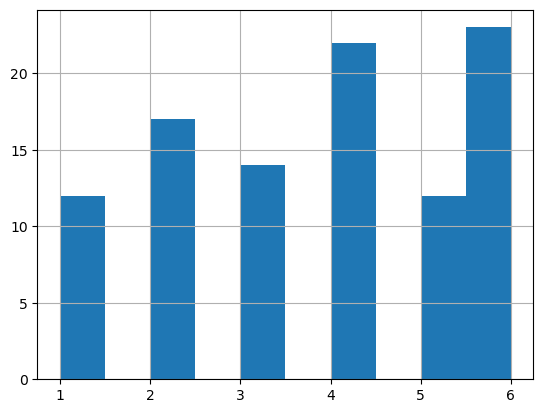

In [16]:
# your code here

data["value"].hist()

In [17]:
"""
your comments here

the number frequency do not change much. The smaple is big and the most frequent values are 4 and 6 so it makes sense that the mean is sligly above 3 by looking at the histogram
"""

'\nyour comments here\n\nthe number frequency do not change much. The smaple is big and the most frequent values are 4 and 6 so it makes sense that the mean is sligly above 3 by looking at the histogram\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

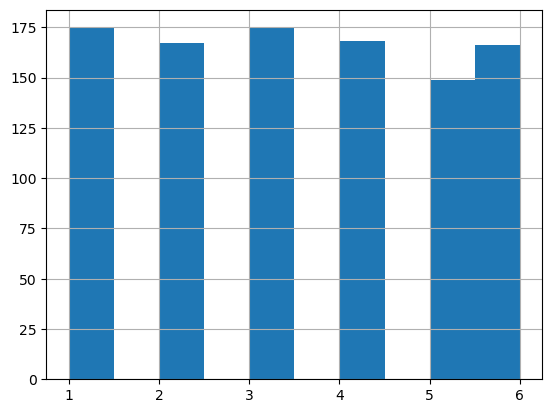

In [18]:
# your code here

from matplotlib.pyplot import hist


dice_thousand=pd.read_csv(r"..\data\roll_the_dice_thousand.csv")
dice_thousand

dice_thousand["value"].hist()

In [19]:
"""
your comments here

the increase of the sample/number of rolls makes the result more homegenous because the probablility of a certain number is the same. In very big sample, the distribution tends
to be that the frequency of the numbers will be the same
"""

'\nyour comments here\n\nthe increase of the sample/number of rolls makes the result more homegenous because the probablility of a certain number is the same. In very big sample, the distribution tends\nto be that the frequency of the numbers will be the same\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

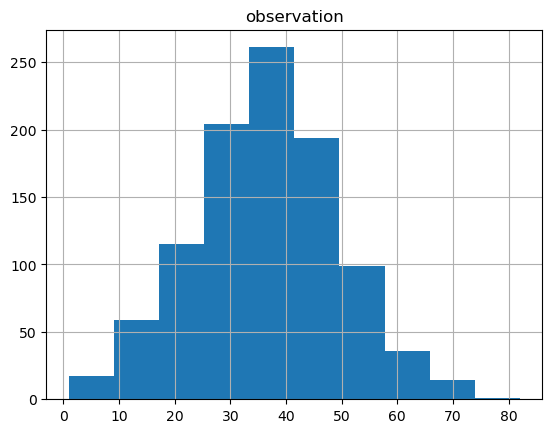

In [20]:
# your code here

age_pop=pd.read_csv(r"..\data\ages_population.csv")
age_pop.hist()

## the skewd seems to be slightly negative. the mean seems close to the mode, that is 37

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [21]:
# your code here

mean=age_pop.mean()
std=age_pop.std()
print(mean, std)

observation    36.56
dtype: float64 observation    12.8165
dtype: float64


In [22]:
"""
your comments here

yes, the mean is close to the mean mentioned before
"""

'\nyour comments here\n\nyes, the mean is close to the mean mentioned before\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<BarContainer object of 18 artists>

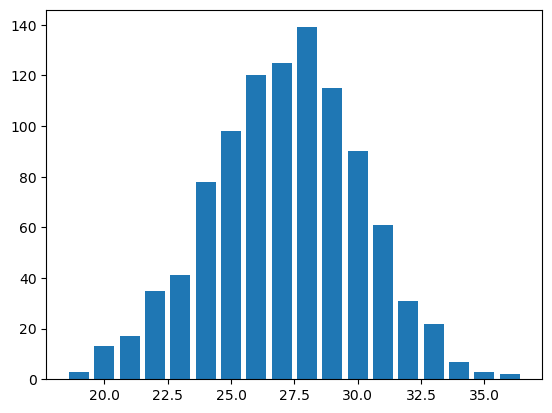

In [23]:
# your code here

ages_pop2=pd.read_csv(r"..\data\ages_population2.csv")
dict_ag2=(pd.DataFrame(ages_pop2.value_counts()).reset_index())
dict_ag2.columns=["age","freq"]
dict_ag2

plt.bar(dict_ag2["age"],dict_ag2["freq"])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [24]:
"""
your comments here
the interval of ages is smaller so we have more bars with less frequency
"""

'\nyour comments here\nthe interval of ages is smaller so we have more bars with less frequency\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [25]:
# your code here

mean=ages_pop2.mean()
std=ages_pop2.std()
print(mean, std)

observation    27.155
dtype: float64 observation    2.969814
dtype: float64


In [26]:
"""
your comments here

both mean and std are much smaller. It makes sense that for a much bigger sample the std tends to be much smaller 
"""

'\nyour comments here\n\nboth mean and std are much smaller. It makes sense that for a much bigger sample the std tends to be much smaller \n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

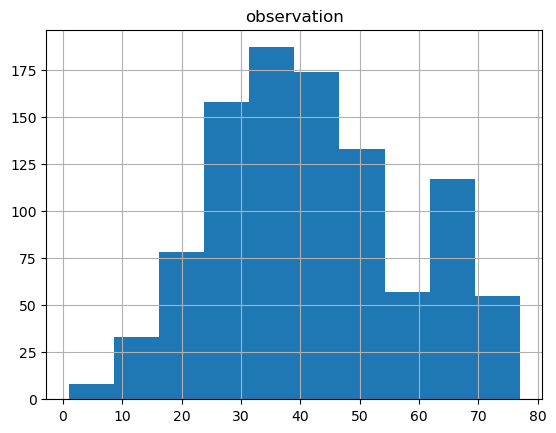

In [27]:
# your code here

ages_pop3=pd.read_csv(r"..\data\ages_population3.csv")
ages_pop3.head()
ages_pop3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [28]:
# your code here
mean=ages_pop3.mean()
std=ages_pop3.std()
print(mean, std)

observation    41.989
dtype: float64 observation    16.144706
dtype: float64


In [29]:
"""
your comments here
the population is becoming older. the skew is positive
"""

'\nyour comments here\nthe population is becoming older. the skew is positive\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [30]:
# your code here
q1=ages_pop3.quantile(q=0.25)
q2=ages_pop3.quantile(q=0.50)
q3=ages_pop3.quantile(q=0.75)

print(q1,q2,q3)


#median is 40 and mean is 41.989

observation    30.0
Name: 0.25, dtype: float64 observation    40.0
Name: 0.5, dtype: float64 observation    53.0
Name: 0.75, dtype: float64


In [31]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:
# your code here

q4=ages_pop3.quantile(q=0.15)
q5=ages_pop3.quantile(q=0.85)

In [33]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [34]:
# your code here

In [35]:
"""
your comments here
"""

'\nyour comments here\n'